In [1]:
__author__  = 'kazem_safari'
# So here our strategy is basically the same.
# First, we load the network model. 
#Second, we initialize all the tf.global_variables in a completely separate session.
    
# Lastly, here, instead of updating them with an optimization function and
# a training loop, we update them by restoring everything from the previously saved model

import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#This module itself depends on tensorflow:
from mnist_helper_functions import param_counter, mnist_inference

tf.reset_default_graph()
#placeholders
x           = tf.placeholder(tf.float32, shape = [None, 784])
y_          = tf.placeholder(tf.float32, shape = [None, 10])
keep_prob   = tf.placeholder(tf.float32)

#reshape the input from 1D-vector to 2D-image 
x_image     = tf.reshape(x, [-1, 28, 28, 1])

#network params and hyperparams
nh_pre      = 1    #number of channels input image
nh1         = 32   #number of units first convolutional layer
nh2         = 64   #number of units second convolutional layer
nh3         = 1024 #numebr of units first fully-connected layer
num_classes = 10   #number of output classes

#building network architecture function
[y_conv, cross_entropy, correct_prediction, accuracy] = \
mnist_inference(x_image,y_, keep_prob, nh1, nh2, nh3, num_classes)
#############################################################
    ###$$$$ Here the first step is completed!
#############################################################
#here since we are restoring a pre-trained model we DONOT need the optimizer function
#with tf.name_scope('adam_optimizer'):
#    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

##########################################################
###########################################################
#This intermediate step is crucial:

    #i) instantiating an inti tensor
    # Add the variable initializer Op.
init         = tf.global_variables_initializer()        

    #ii) redefining a new instance of a sever object in tensorflow
    # Create a saver.
saver        = tf.train.Saver()
###########################################################
###########################################################

# path where the results of training are saved
model_path   = 'mnist_trad/mnist_trad.ckpt' 
save_path    = model_path

sess = tf.InteractiveSession()
#with tf.Session() as sess:
####################################################
####################################################
sess.run(init) 
###$$$$ Here the second step is completed!
####################################################
####################################################


####################################################
####################################################
saver.restore(sess, model_path)
print("Model restored from file: %s" % save_path)
###$$$$ Here the last step is completed!

#One key thing to remember, based on what i
#have read and what a ta had told me, is that, 
#to restore a model completely,
#so that no part of our model would be missing,
#we need to access all these files simultaneously:
#####################
#mnist_trad.ckpt.meta
#mnist_trad.ckpt.index
#mnist_trad.ckpt.data-00000-of-00001
#checkpoint

#And the only way which is possible to do that is
#through saver.restore(sess, model_path)
#which accesses all these file altogether!
########################
####################################################
####################################################
#mnist_trad_restore()

INFO:tensorflow:Restoring parameters from mnist_trad/mnist_trad.ckpt
Model restored from file: mnist_trad/mnist_trad.ckpt


In [ ]:
#mnist_patch_occlusion

In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist0 = input_data.read_data_sets("MNIST_data/", one_hot=False)
mnist1 = input_data.read_data_sets("MNIST_data/", one_hot=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
N = 1000
images       = mnist1.test.images[0:N]
labels0      = mnist0.test.labels[0:N] #one_hot = False
labels1      = mnist1.test.labels[0:N] #one_hot = True
correct_prediction, accuracy = \
sess.run([correct_prediction, accuracy], feed_dict={x: images, y_: labels1, keep_prob: 1.0})

#np.set_printoptions(threshold=np.nan)
#print(correct_prediction)
#print(accuracy)

In [4]:
#correct_prediction = correct_prediction.reshape((1,N))
#print(type(correct_prediction))
#print(correct_prediction.dtype)
#print(correct_prediction.shape)
#print(correct_prediction)
#print(correct_prediction.nonzero())

#here we extract the correctly classified labels for occlusion analysis:
imgs_correctly_classified    = images[correct_prediction.nonzero()]
labels0_correctly_classified  = labels0[correct_prediction.nonzero()]
labels1_correctly_classified  = labels1[correct_prediction.nonzero()]
#print(labels_correctly_classified)

#here we extract the indicies of each class from labels_correctly_classified
list_digitclass_indicies =[]
for i in range(10):
    digitclass = np.nonzero(labels0_correctly_classified==i)
    #print(digitclass)
    list_digitclass_indicies.append(digitclass)


print(list_digitclass_indicies)



[(array([  3,  10,  13,  25,  28,  55,  69,  71, 101, 126, 136, 148, 157,
       183, 188, 192, 194, 215, 246, 268, 270, 293, 295, 296, 304, 310,
       311, 321, 324, 343, 362, 369, 377, 404, 421, 437, 438, 440, 452,
       478, 483, 490, 517, 537, 538, 544, 553, 556, 558, 571, 575, 580,
       585, 596, 599, 606, 628, 630, 642, 646, 685, 688, 696, 702, 704,
       722, 730, 743, 774, 784, 801, 824, 829, 832, 849, 861, 872, 873,
       881, 908, 946, 955, 967, 971]),), (array([  2,   5,  14,  29,  31,  37,  39,  40,  46,  57,  74,  89,  94,
        96, 107, 135, 137, 143, 145, 154, 168, 176, 178, 180, 189, 190,
       191, 196, 202, 203, 204, 224, 228, 239, 251, 264, 266, 271, 275,
       278, 287, 301, 313, 326, 327, 329, 339, 342, 345, 347, 351, 354,
       374, 375, 382, 385, 390, 406, 413, 416, 424, 427, 448, 466, 469,
       473, 482, 496, 498, 515, 521, 529, 573, 602, 626, 633, 638, 648,
       657, 660, 667, 679, 680, 684, 699, 706, 716, 725, 729, 734, 735,
       747, 748, 752

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
predicted label: [7]



predicted label: [7]



predicted label: [5]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [5]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [5]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



predicted label: [7]



36


/home/alleria/virtualenvs/tensorflow1.4/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



predicted label: [2]



36
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
predicted label: [1]



predicted label: [1]


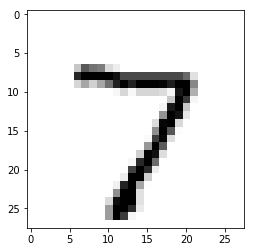

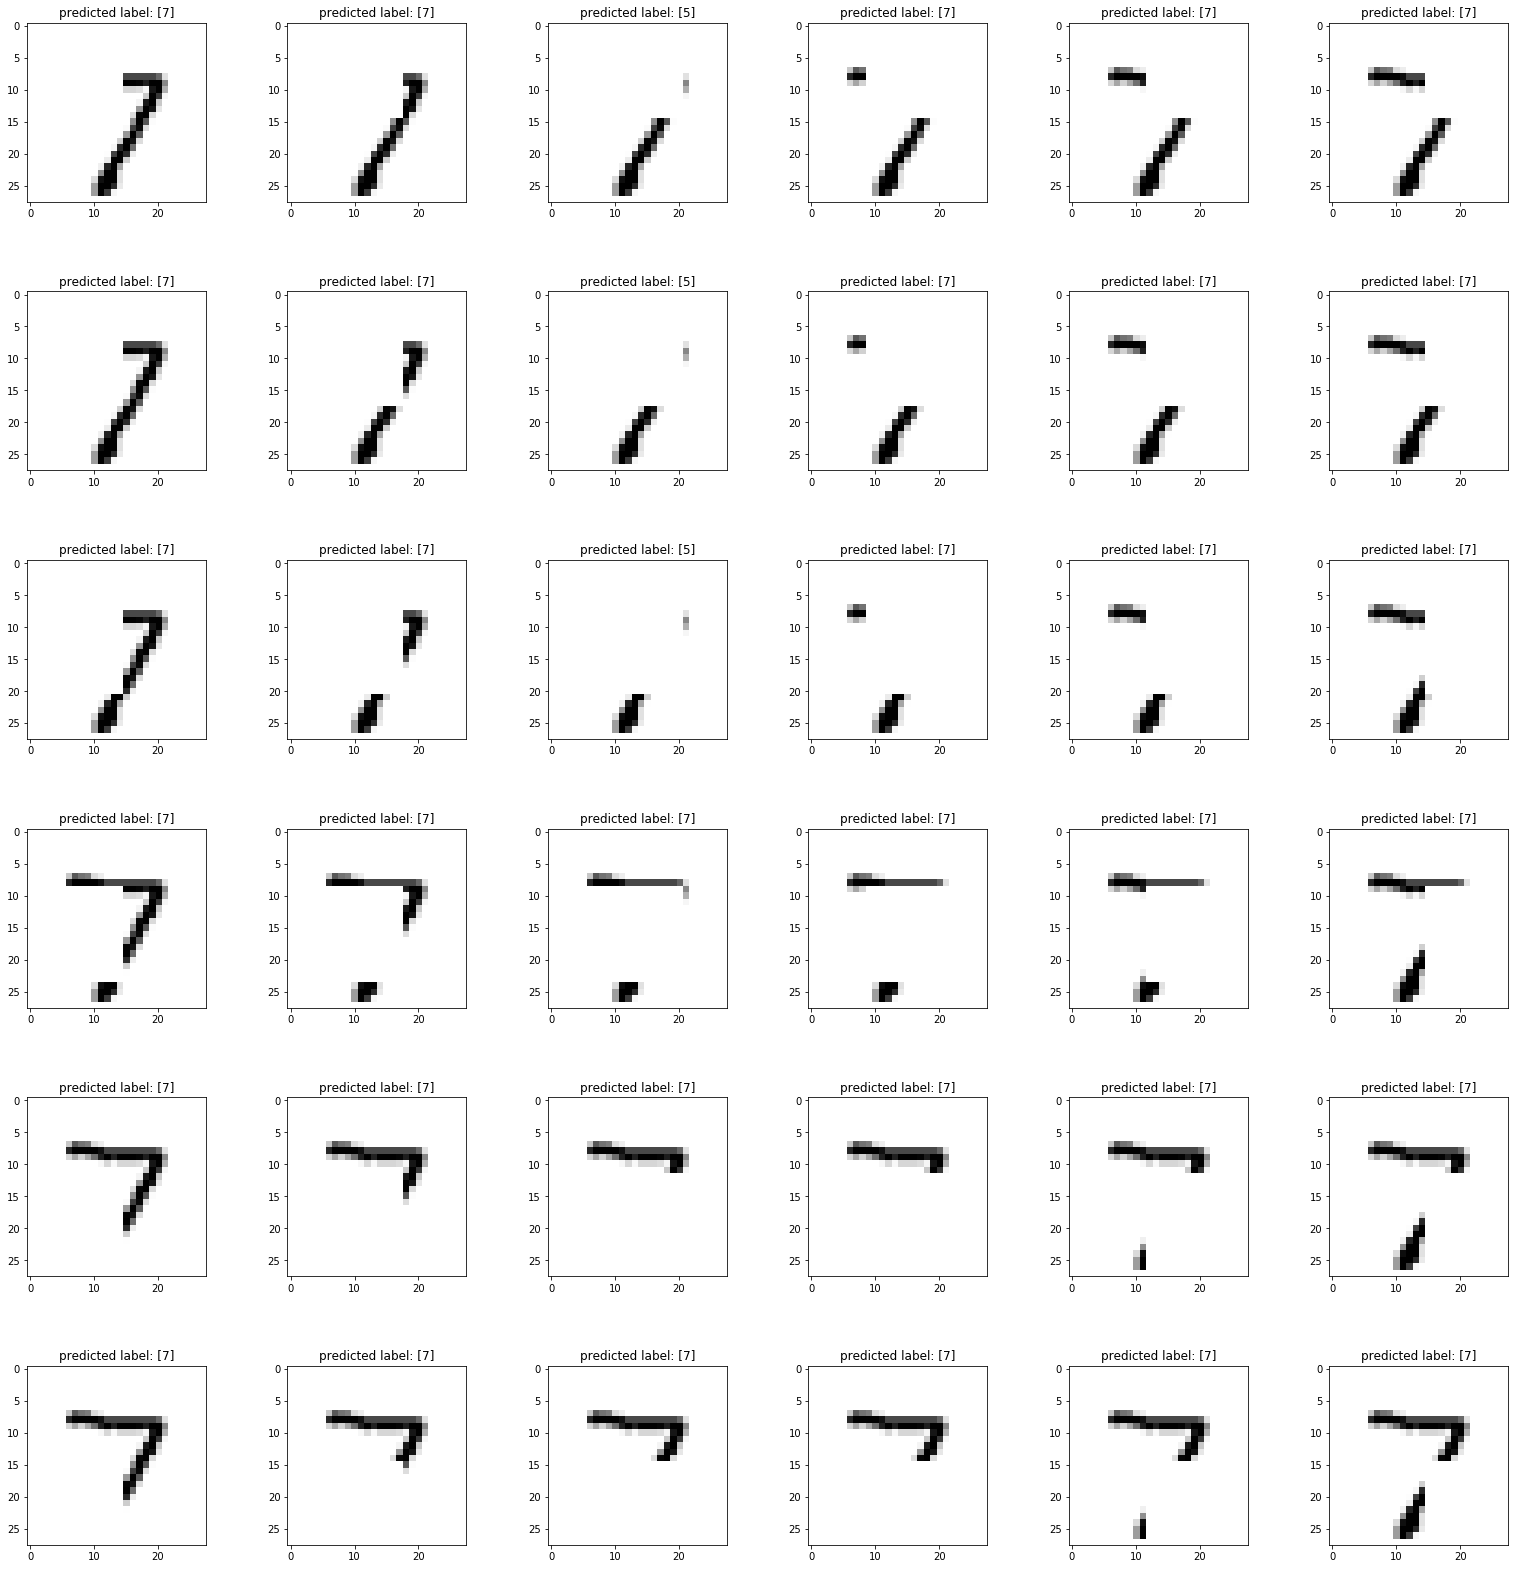

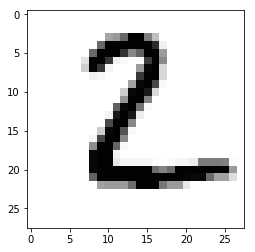

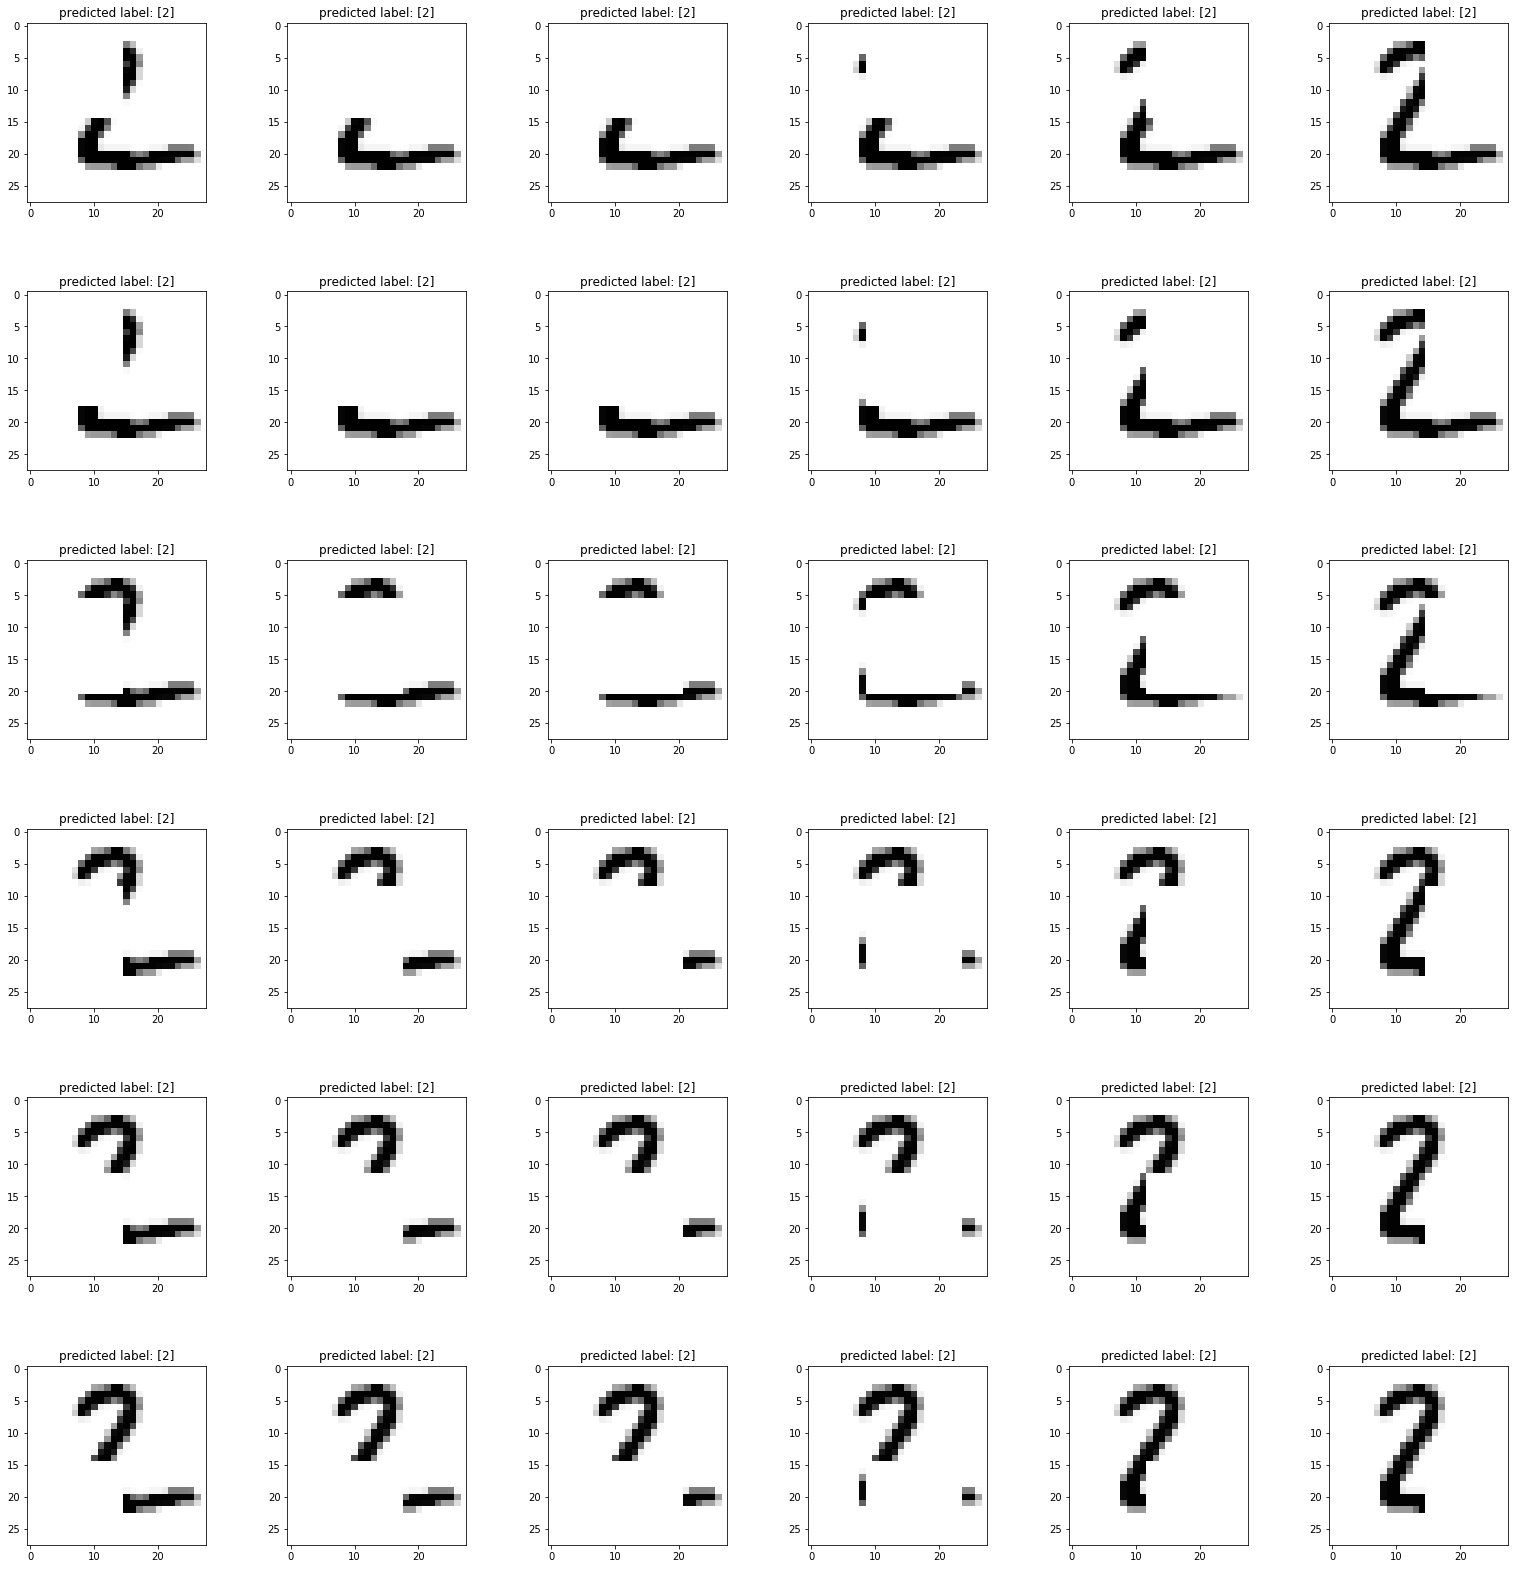

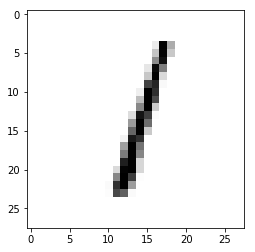

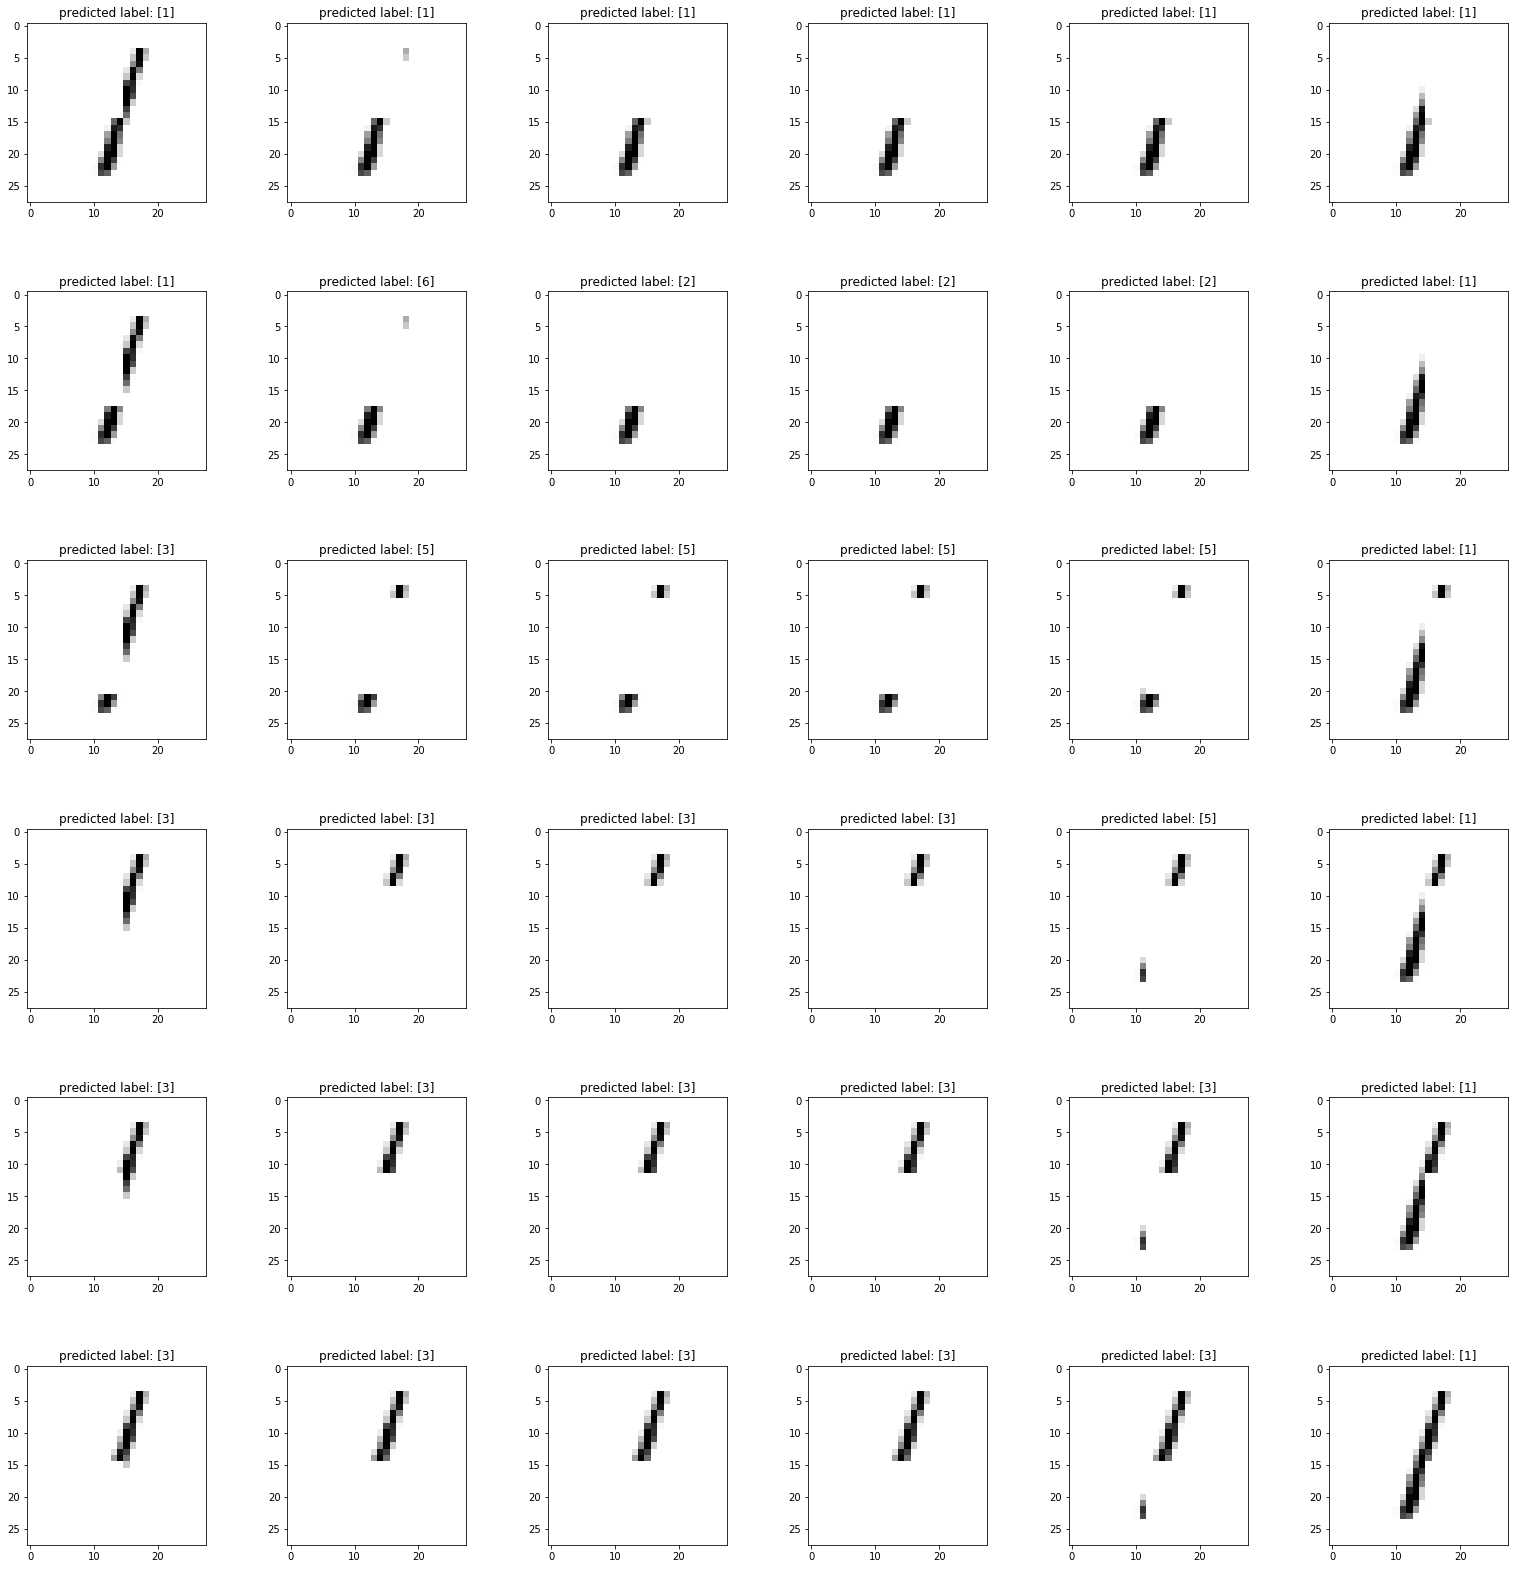

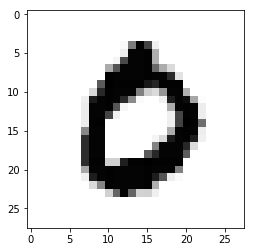

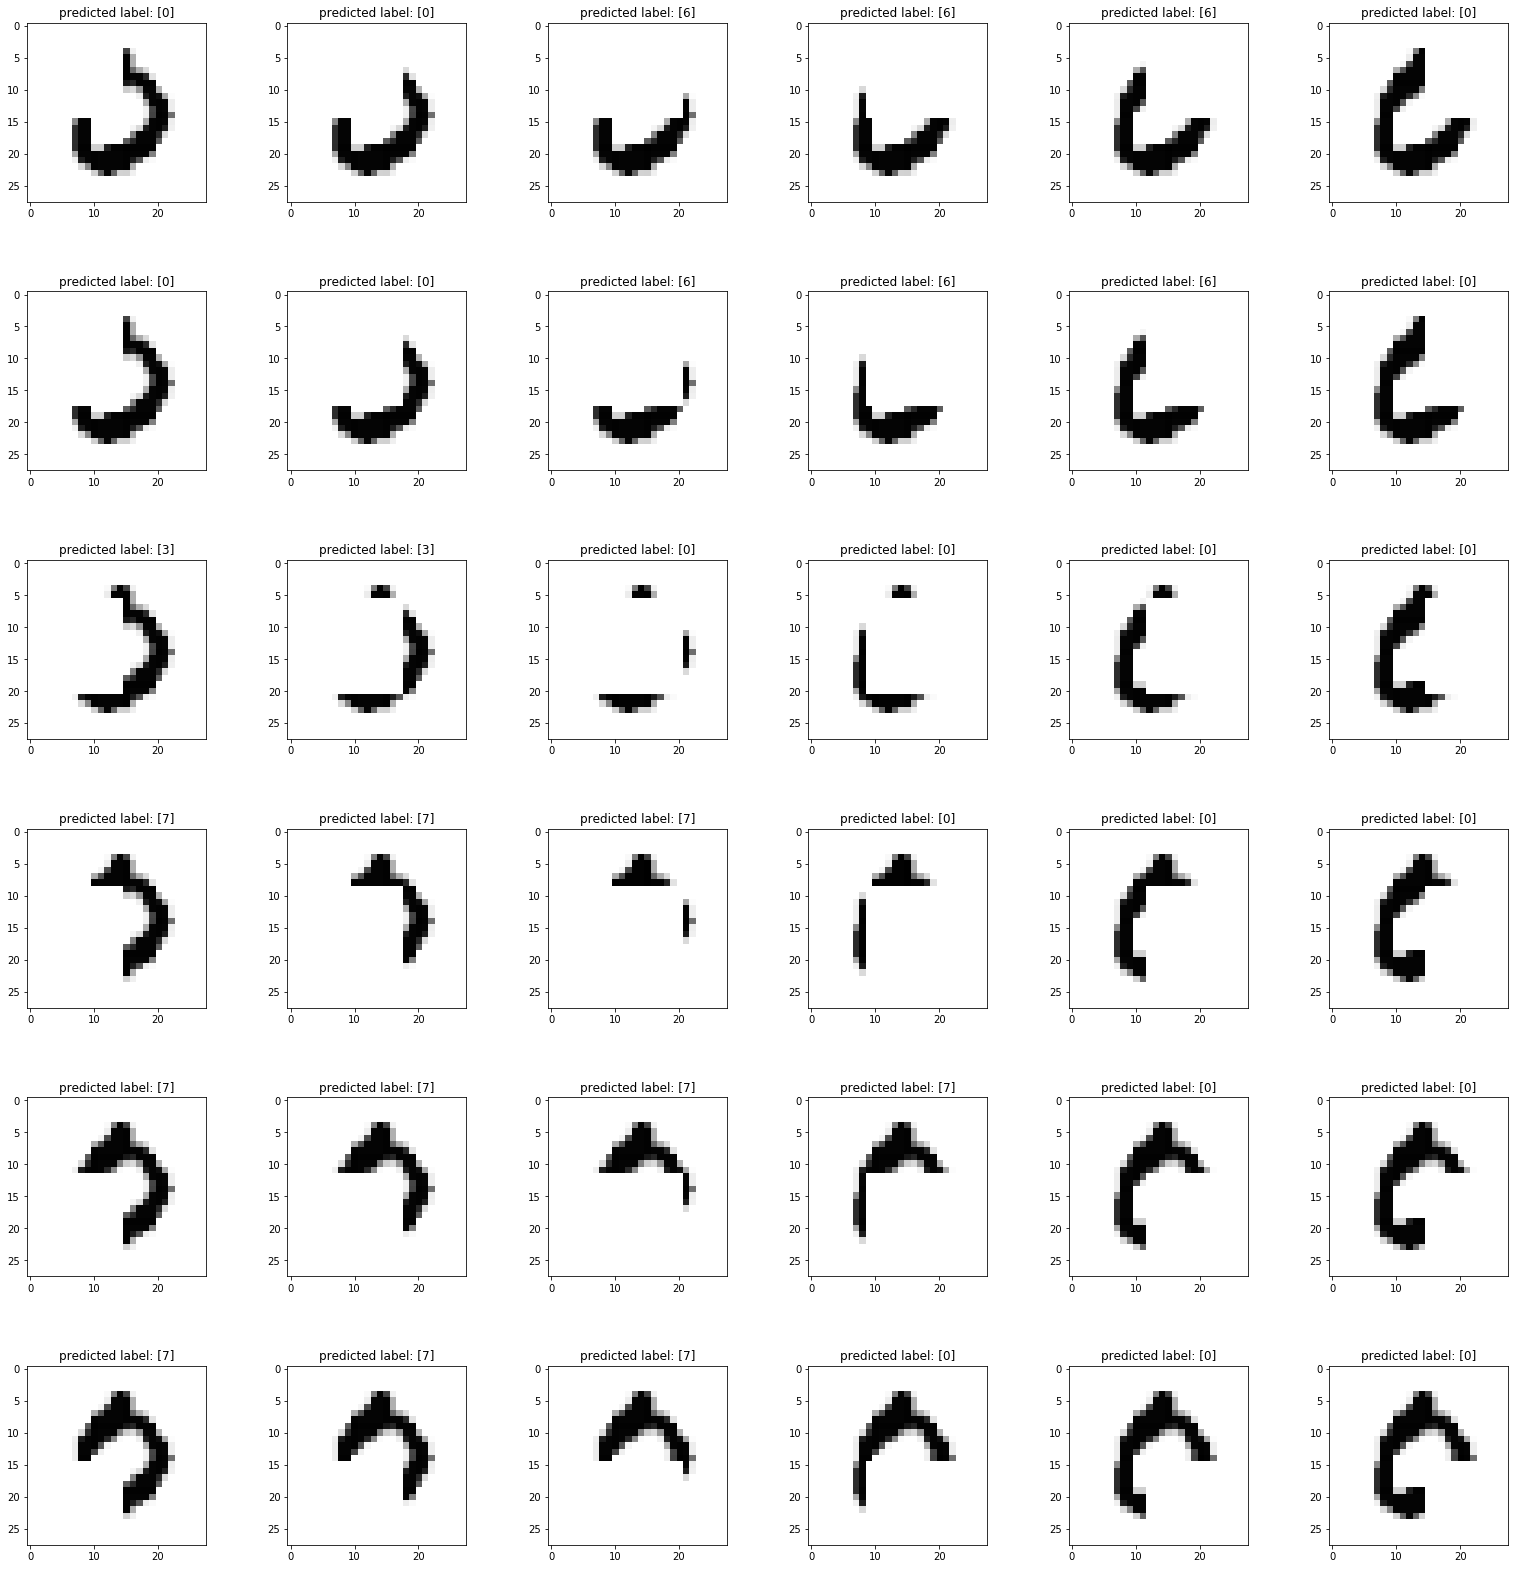

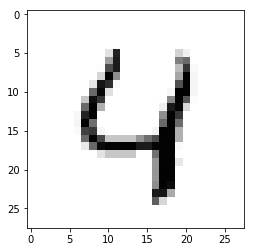

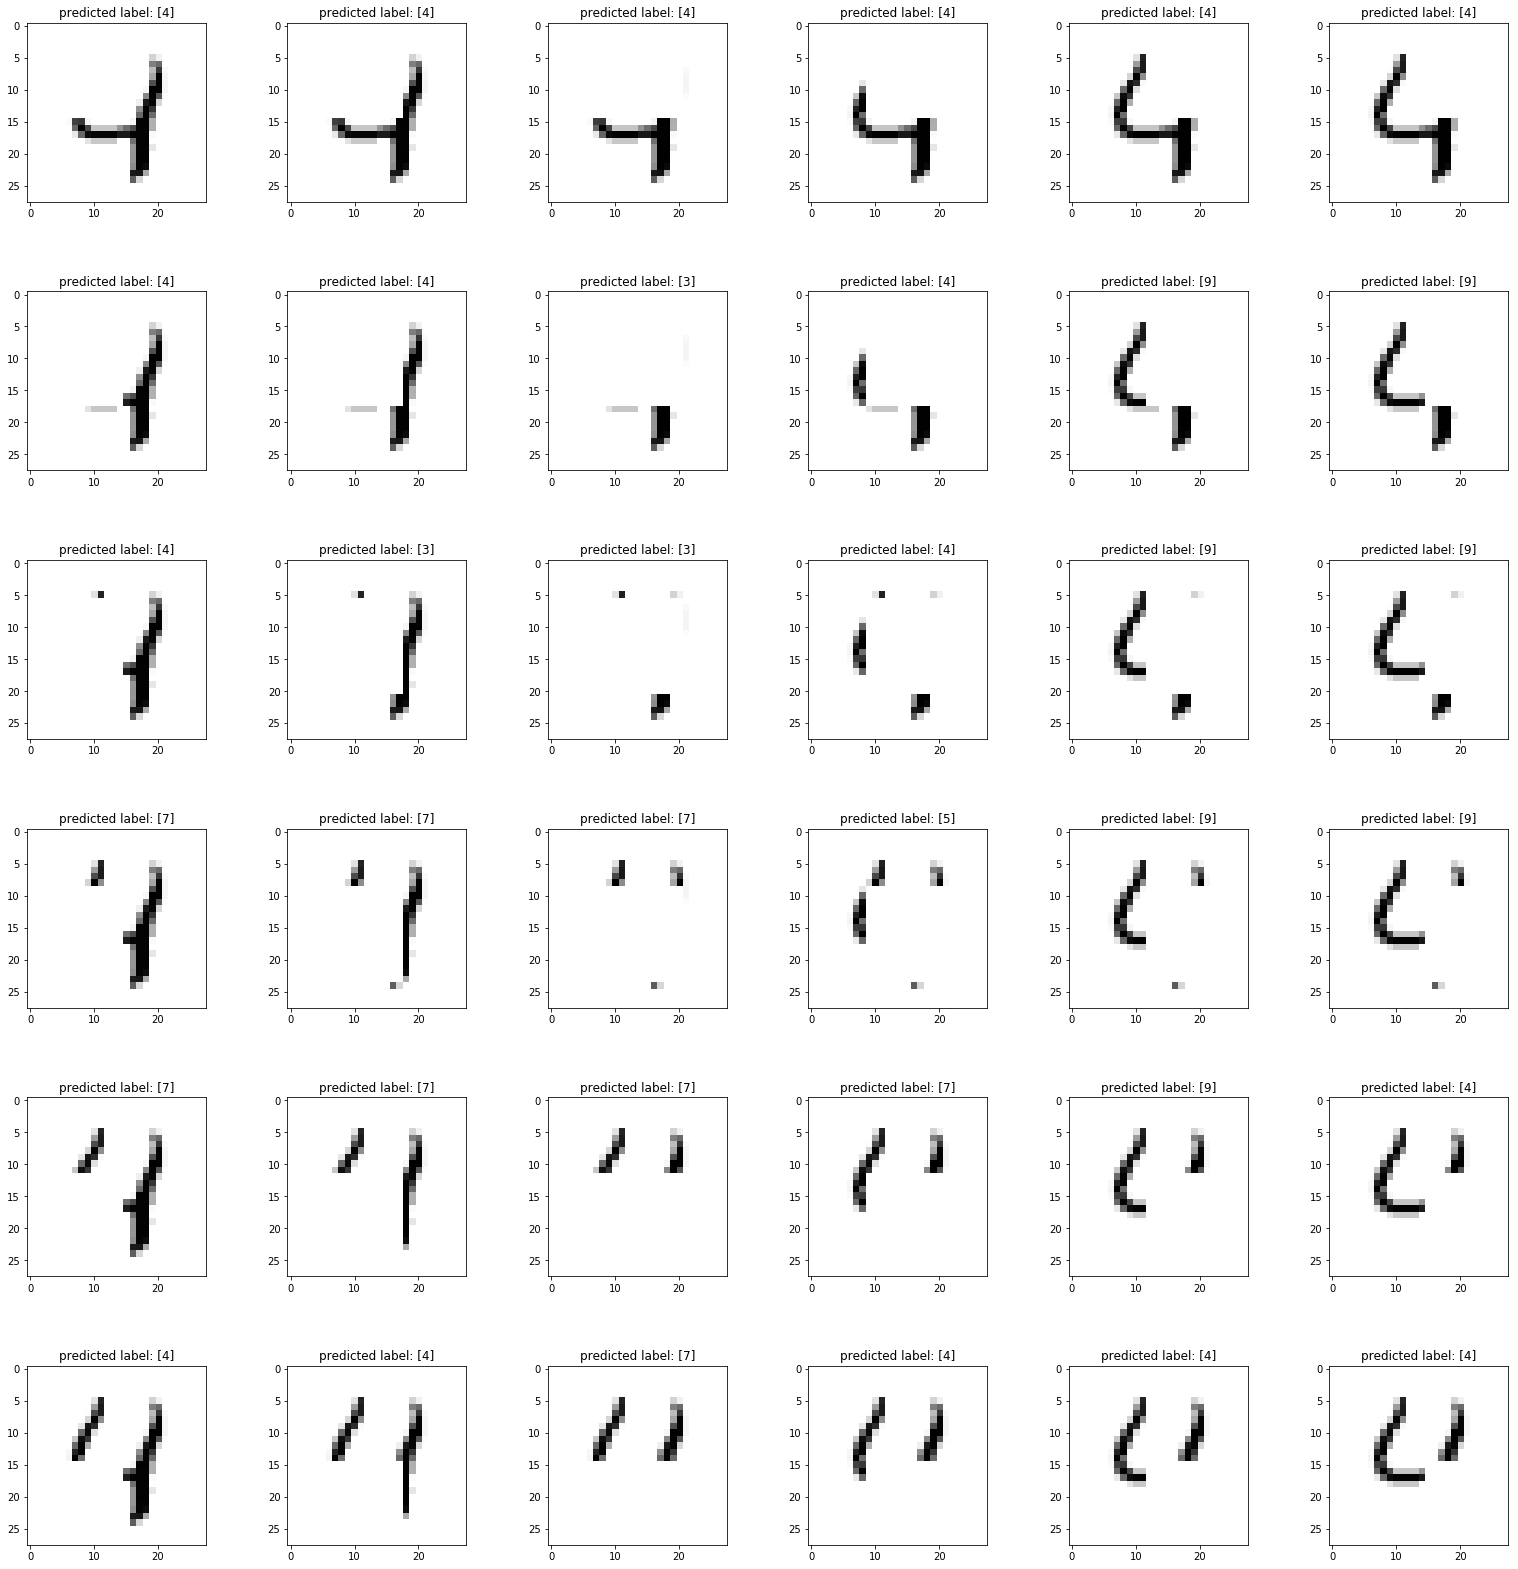

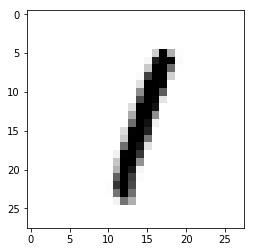

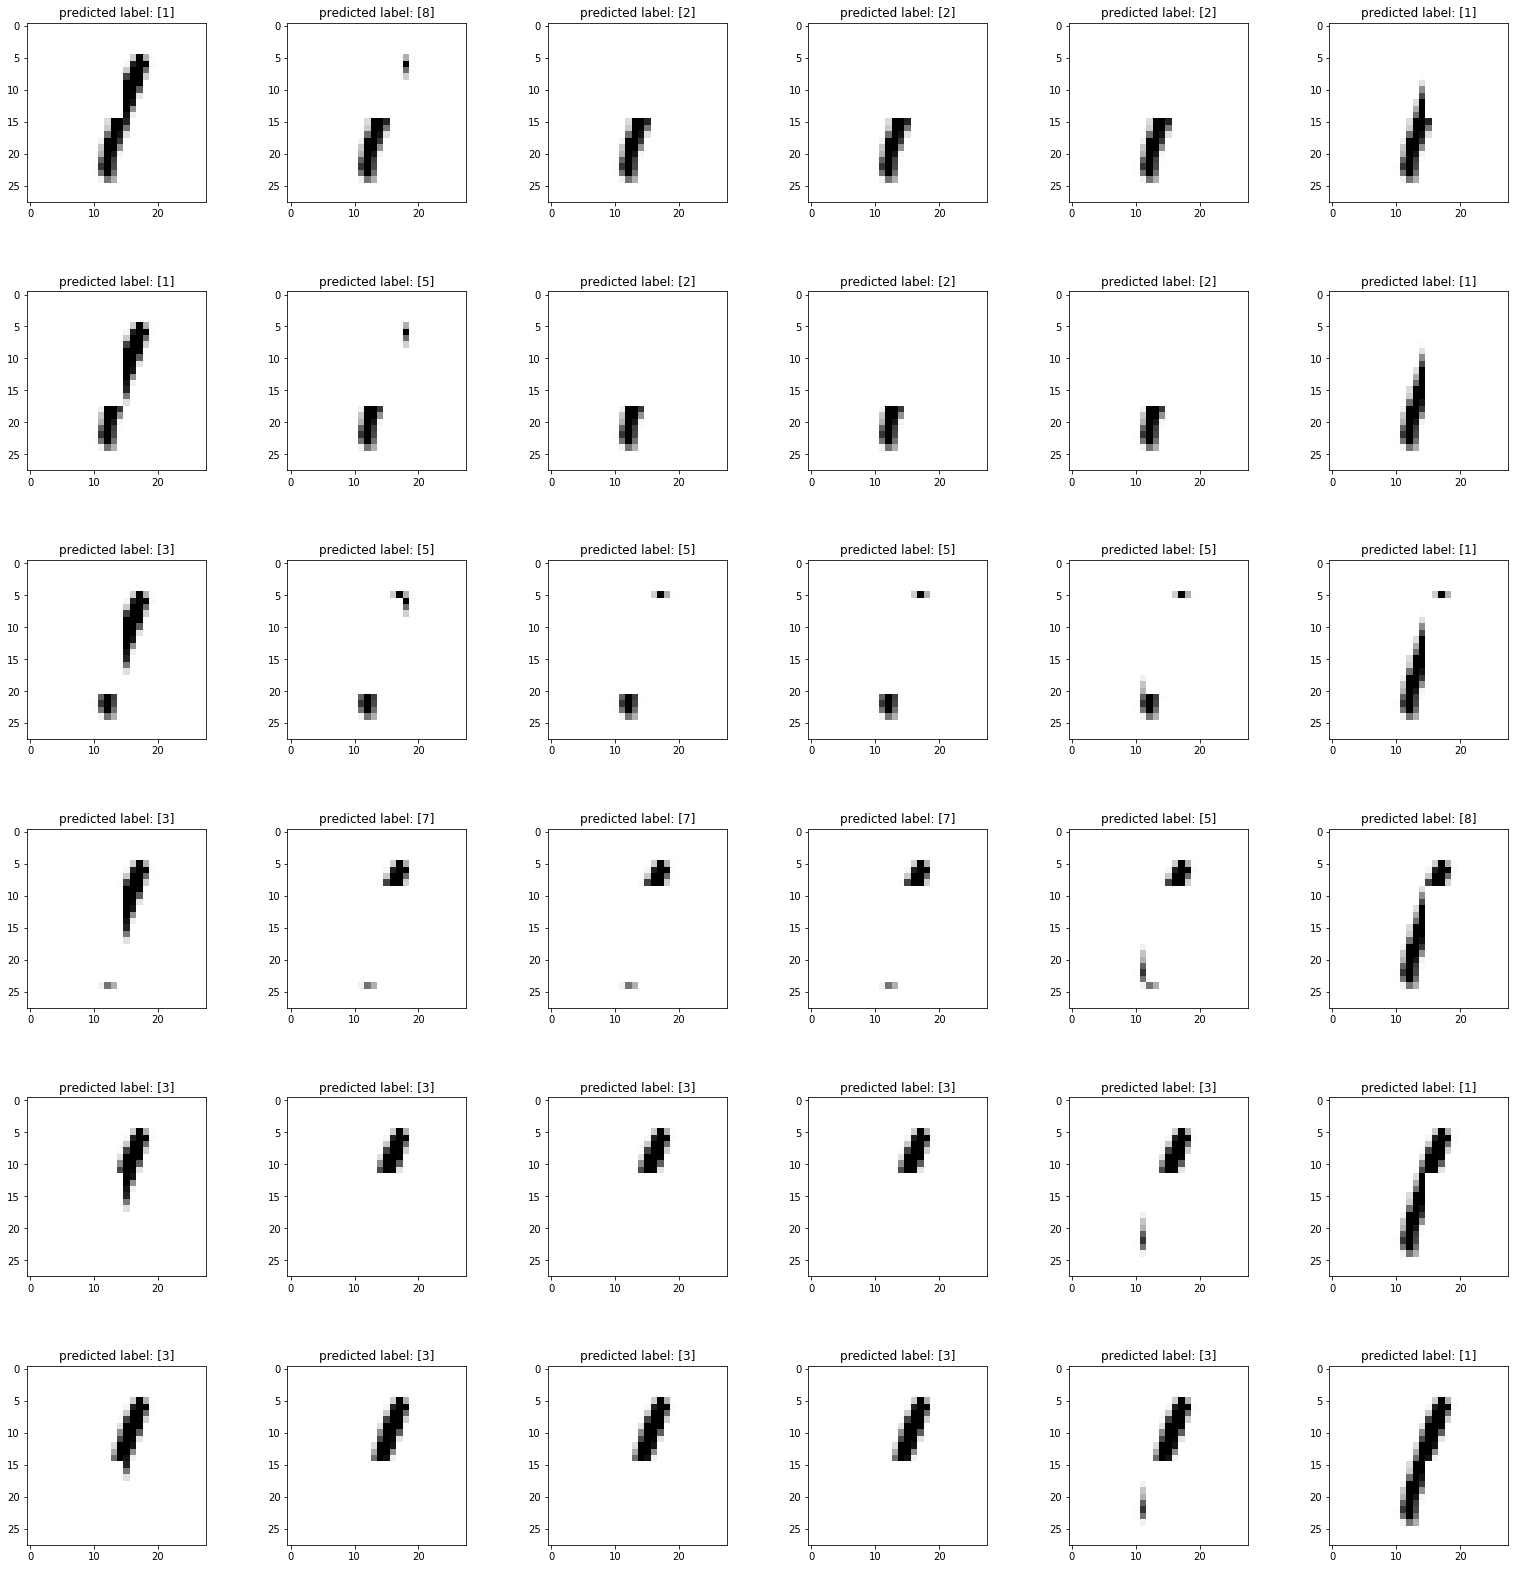

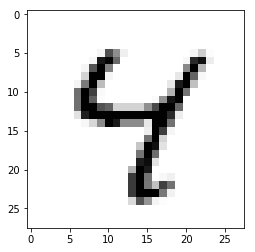

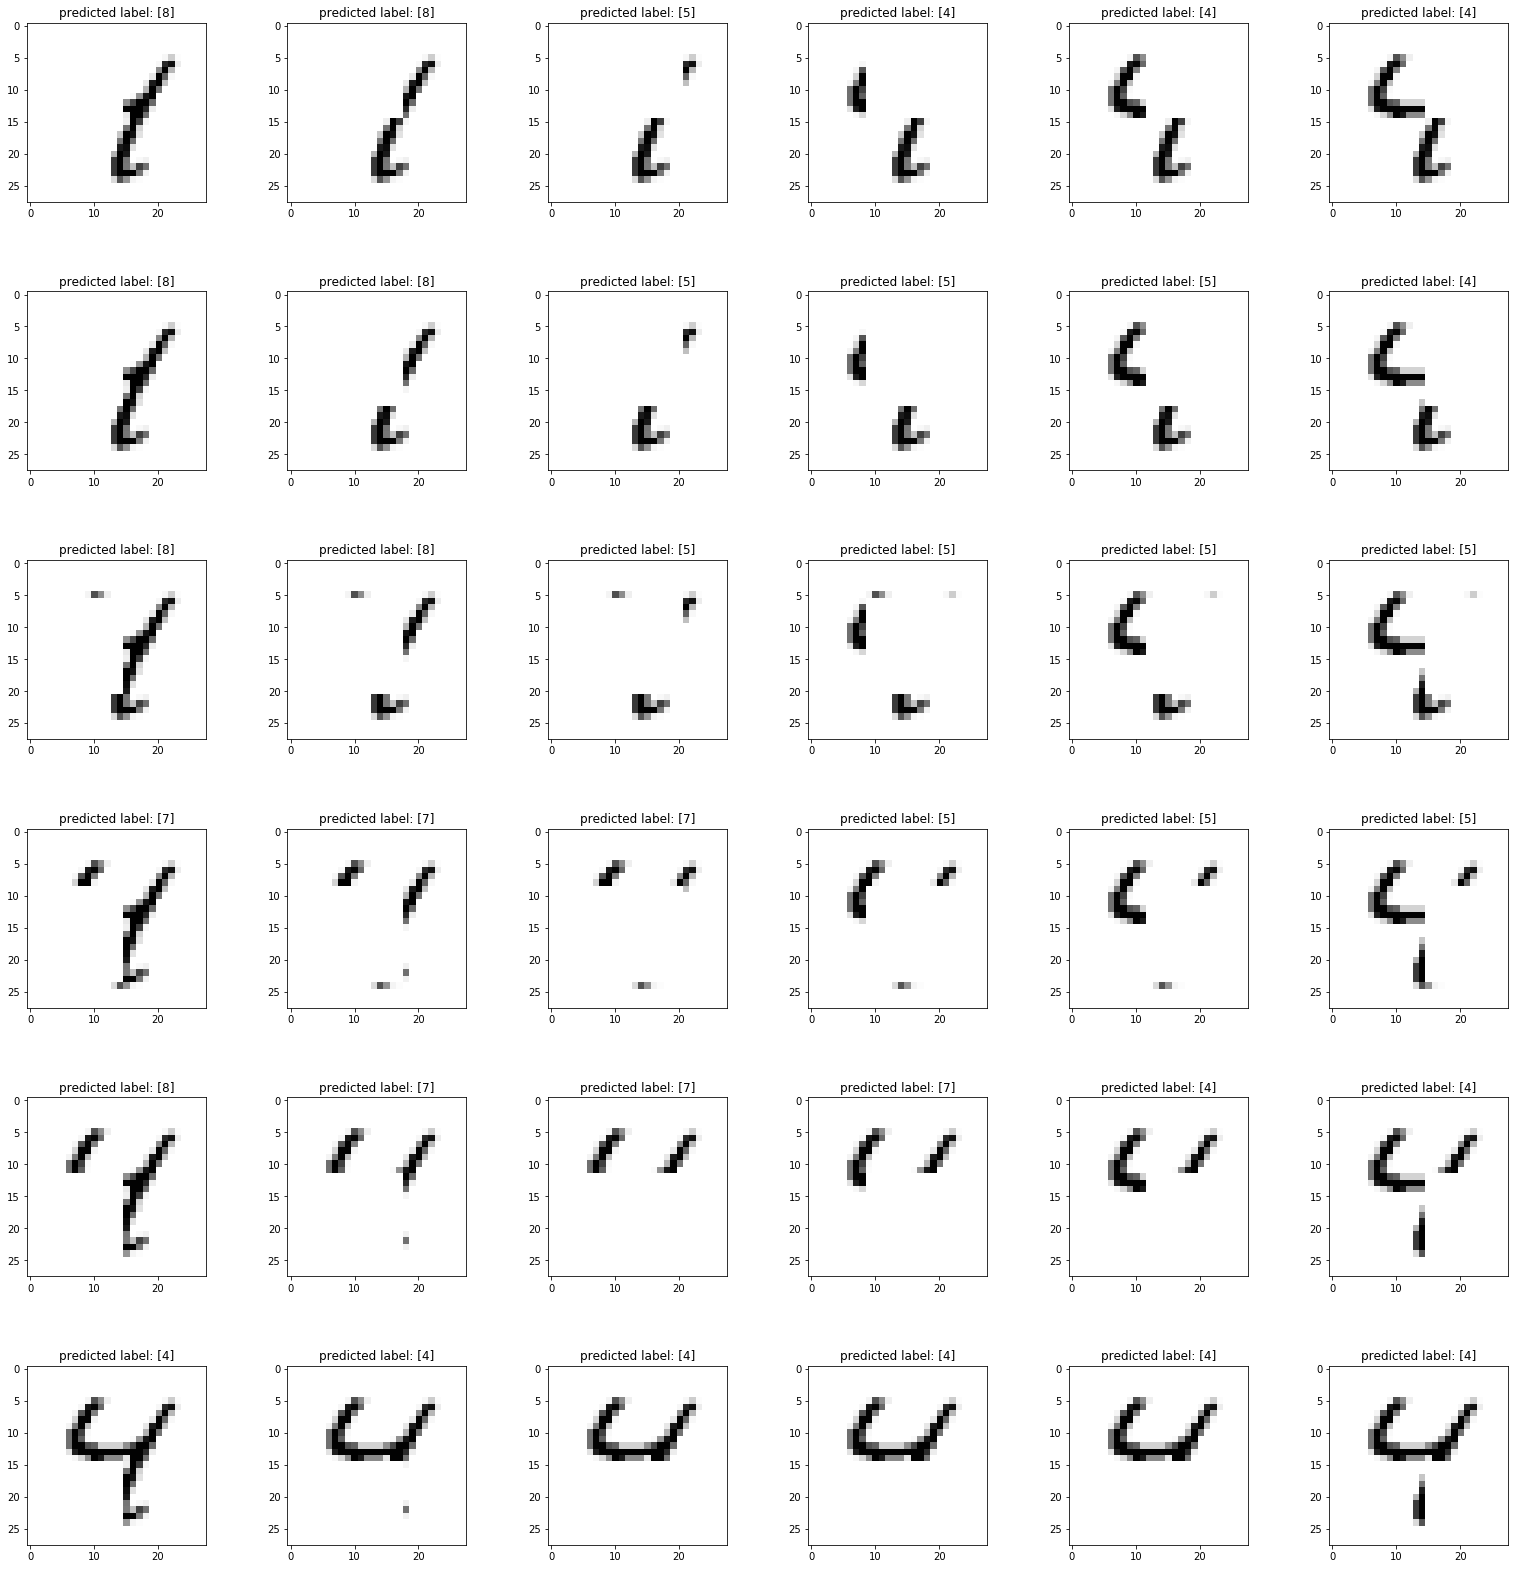

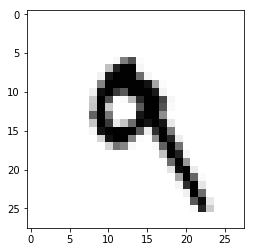

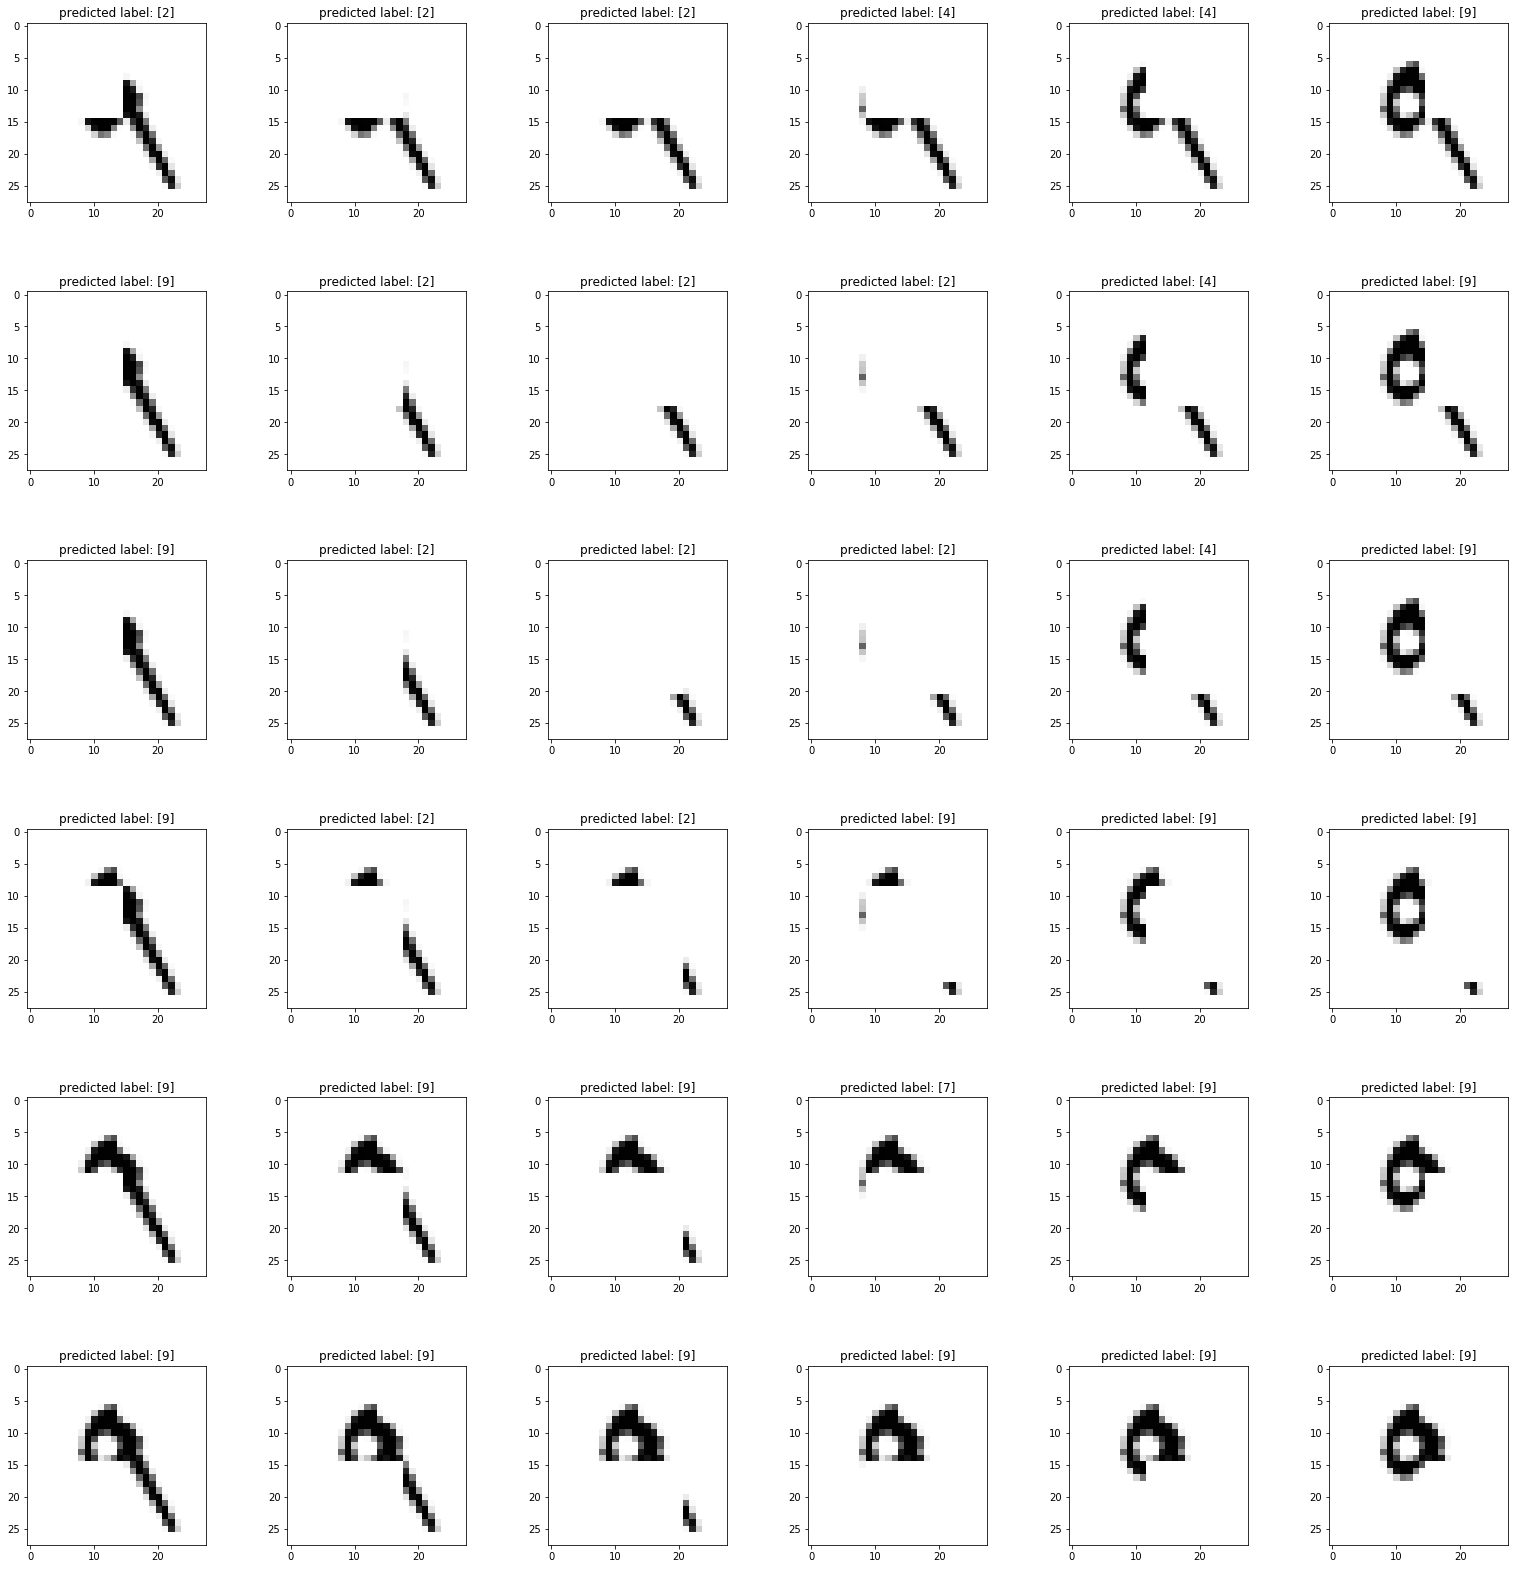

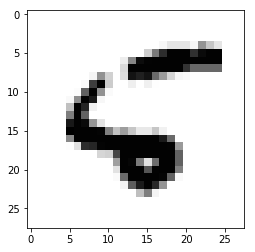

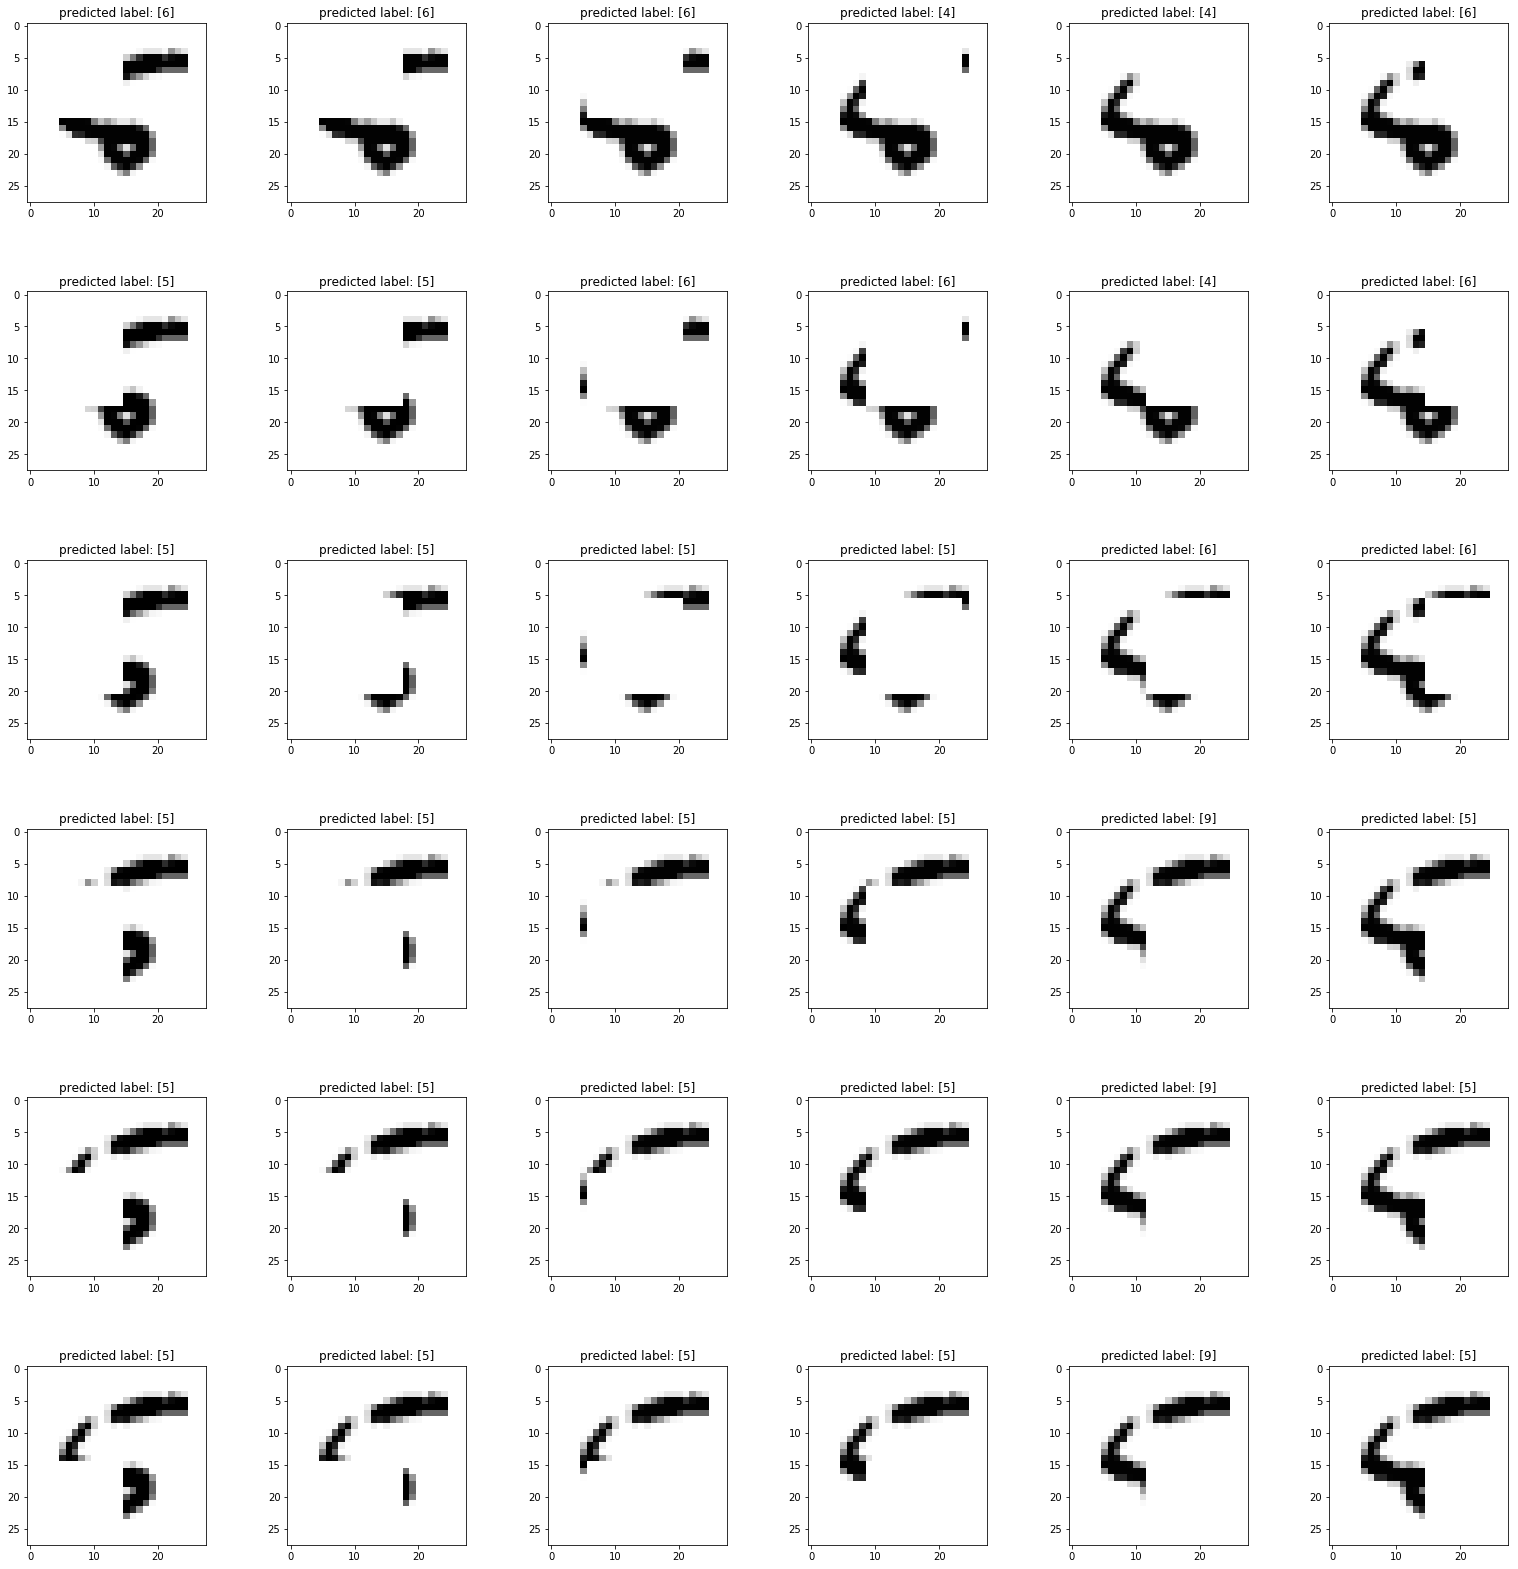

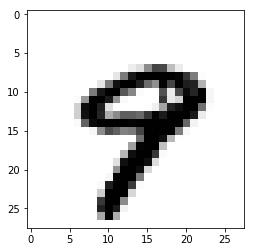

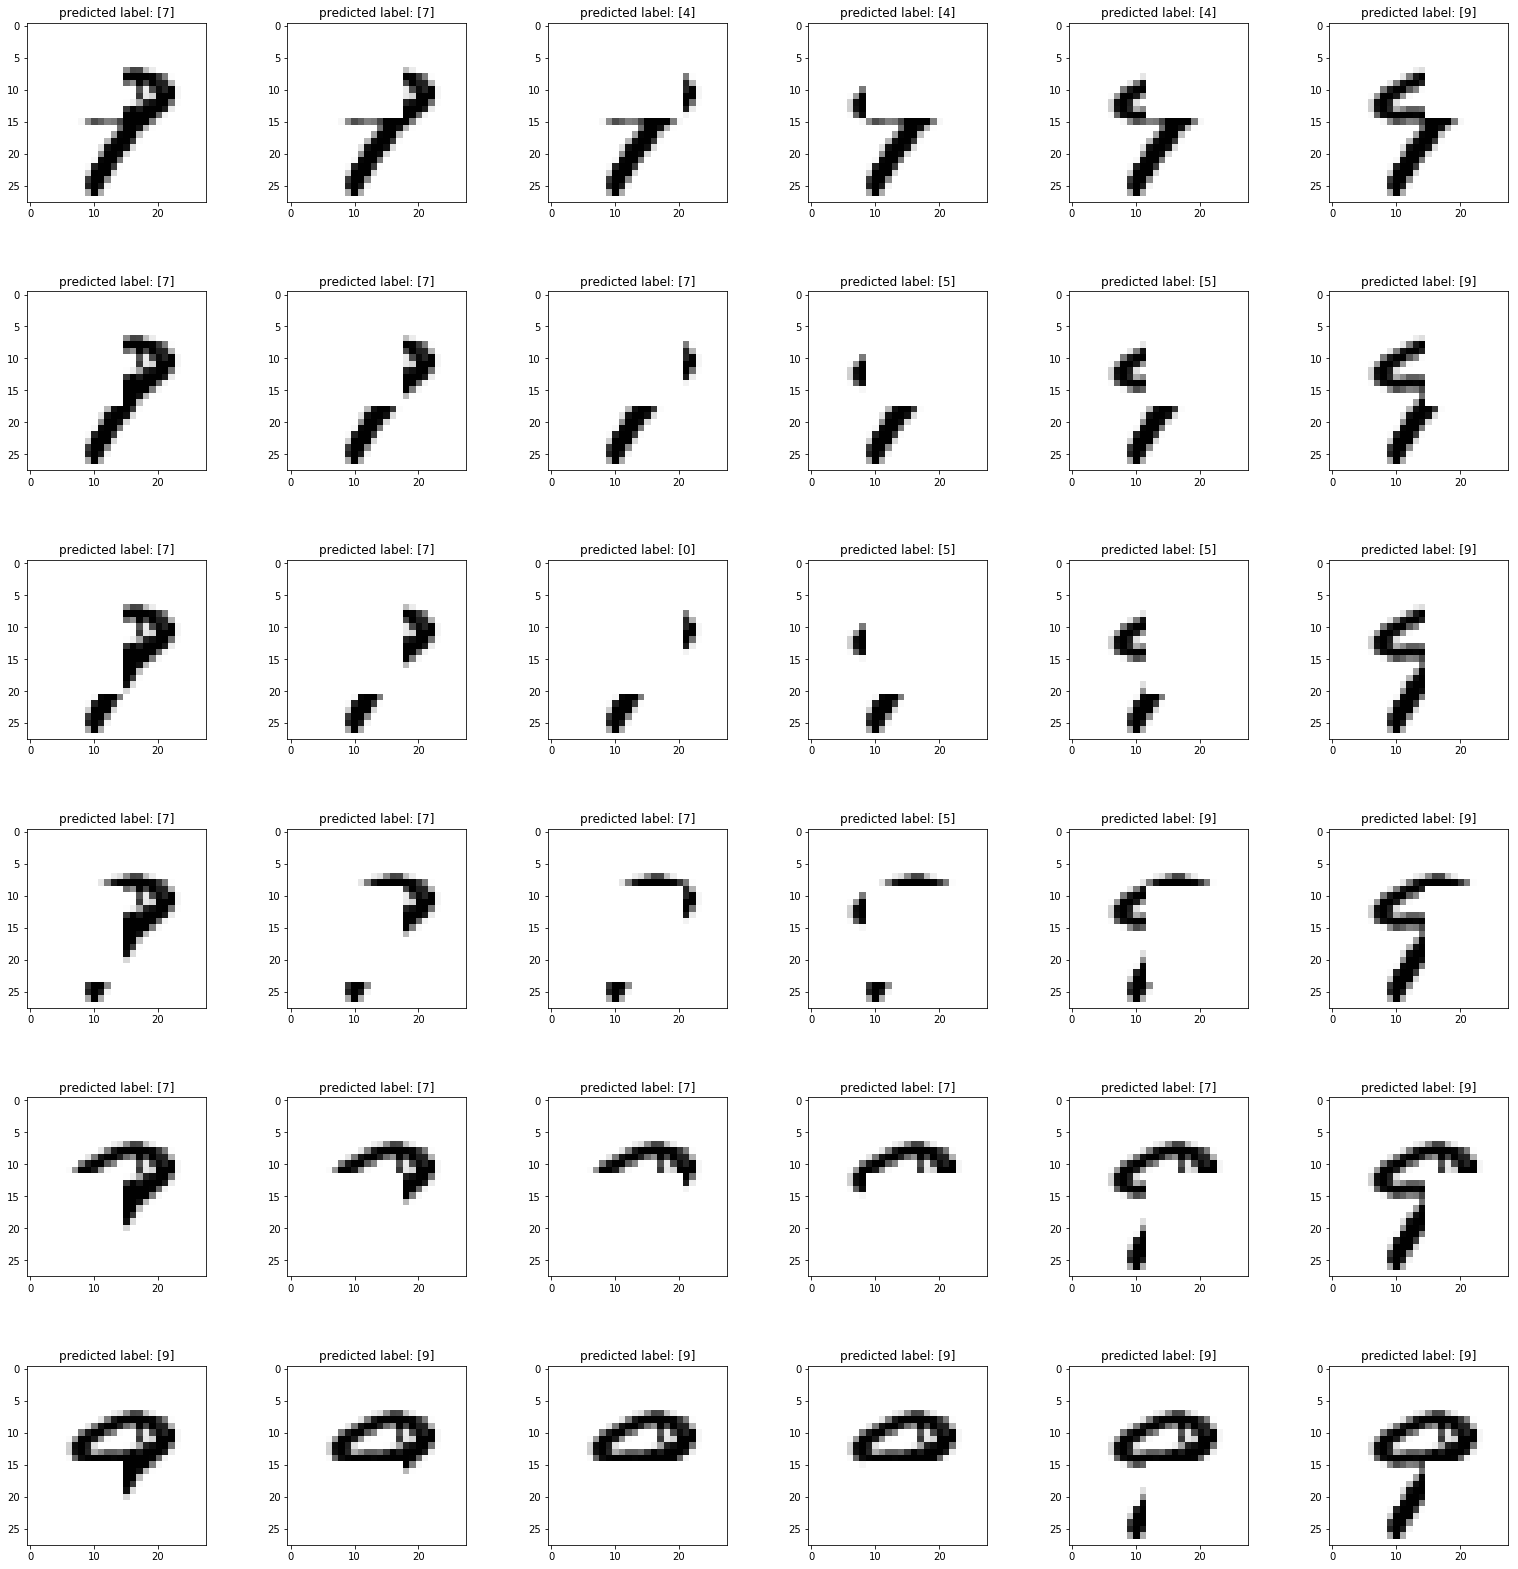

In [13]:
M = 10#number of images for display
for k in range(M):
    # a sample image and label
    img_placeholder   = imgs_correctly_classified[k].reshape((1,784)) #k is the iterable
    img               = img_placeholder.reshape(28,28) 
    plt.imshow(img, cmap='Greys')
    
    sample_label0 = labels0_correctly_classified [k] #k is the iterable
    sample_label1 = labels1_correctly_classified [k] #k is the iterable
    
    img_placeholder   = img.reshape((1,784))
    label_placeholder = sample_label1.reshape((1,10))
    print(label_placeholder)
    #true_label        = np.argmax(label_placeholder, axis=1)
    #print("true accuracy: ", sess.run(accuracy, feed_dict={x:img_placeholder, y_:label_placeholder, keep_prob: 1.0}))
    #dimensions of our rectanglur moving occlusion patch
    w = 15
    h = 15

    #sizes of our strides
    strides2 = strides1 = 3

    #########################################
    #previous strategy!
    # we aim to occlude only the nonzero portion of the image which contains essential information
    #print(img.nonzero())
    #max_r = np.max(img.nonzero(), axis = 1)[0]
    #max_c = np.max(img.nonzero(), axis = 1)[1]
    #min_r = np.min(img.nonzero(), axis = 1)[0]
    #min_c = np.min(img.nonzero(), axis = 1)[1]
    # range objects for performing iterations in for loops
    #iter_columns    = range(min_r,max_r-w+strides1, strides1)
    #iter_rows       = range(min_c, max_c-h+strides2, strides2)
    ############################################


    ################################################
    ##################################################
    #Our new strategy
    iter_columns = range(0,28-w+strides1,strides1)
    iter_rows    = range(0,28-h+strides2, strides2)
    ##############################################
    ################################################

    #total number of possible occlusions in each dimension 
    num_rows     = len(iter_columns)
    num_columns  = len(iter_rows) 



    # plotting figures of occluded image
    fig, axs = plt.subplots(num_rows,num_columns, figsize=(28, 28))
    fig.subplots_adjust(hspace = .5, wspace=.001)

    axs = axs.ravel()
    index = 0
    #axs[index].imshow(sample_image, cmap='Greys')
    #axs[index].set_title("true label "+ str(true_label))
    #index +=1

    for i in iter_columns:
        for j in iter_rows:

            occluded_img = img.copy()
            if i == iter_columns[-1]:
                occluded_img[i:-1, j:j+h] = 0
                #print(range(i, -1), range(j, j+h))
            
            elif j == iter_rows[-1]:
                occluded_img[i:i+w, j:-1] = 0
                #print(range(i, i+w), range(j,-1))

            else:
                occluded_img[i:i+w, j:j+h] = 0
                #print(range(i, i+w), range(j,j+w))
                
            occluded_img_placeholder = occluded_img.reshape((1,784))
            fig = plt.figure()

            #label_placeholder is the same as the label_placeholder for the original image 
            net_output      = sess.run(y_conv, 
                                 feed_dict={x:occluded_img_placeholder, y_:label_placeholder, keep_prob: 1.0})
            #print(net_output)
            #probs           = sess.run((tf.nn.softmax(net_output)))
            #print(probs)
            perdicted_label = np.argmax(net_output, axis=1)
            print("predicted label:", perdicted_label)
            #print("accuracy:", acc)
            print(2*'\n')


            axs[index].imshow(occluded_img, cmap='Greys')
            axs[index].set_title("predicted label: "+ str(perdicted_label))
            index +=1
    print(index)